In [40]:
import pandas as pd
import seaborn as sns

In [41]:
teams = 16
team_budget = 269
league_dollars_total = teams * team_budget
roster_size = 14
starters = 10
total_players = teams * roster_size

In [42]:
df = pd.read_excel('/Users/jjcaine/Downloads/BBM_projections_combined.xls', index_col='Rank',
                  dtype={'Inj': str, })
df

,Own,Round,Value,$,Name,Inj,Team,Conf,Pos,Depth,...,3V,aV,sV,bV,ft%V,drV,orV,toV,3%V,adjfg%V
Rank,,,,,,,,,,,,,,,,,,,,,
1,NaN,1,1.523783,88.921799,Stephen Curry,nan,GSW,4,G,ST,...,3.518686,1.596950,1.344072,-0.963821,2.151821,0.044317,-0.521542,-1.907448,5.318220,3.981220
2,NaN,1,1.170808,72.773242,Karl-Anthony Towns,nan,MIN,4,C,ST,...,0.066035,-0.113308,-0.622785,1.400650,2.031270,2.776326,1.926805,-0.399884,1.358529,2.691021
3,NaN,1,1.040571,66.814949,Anthony Davis,nan,NOR,4,F/C,ST,...,-0.675697,-0.095161,1.690894,4.033673,1.335237,2.359366,1.319196,-0.717390,-0.786639,0.375774
4,NaN,1,0.942046,62.307443,Kevin Durant,nan,GSW,4,F,ST,...,1.025376,1.124162,-0.433747,1.571103,2.242205,1.073931,-0.927104,-1.623035,1.776231,2.374106
5,NaN,1,0.925765,61.562587,Nikola Jokic,nan,DEN,4,C,ST,...,0.204356,1.825411,0.486685,0.518959,1.097442,2.409215,1.615106,-1.601136,1.056444,1.380878
6,NaN,1,0.890864,59.965881,Kevin Love,Out - left foot soreness (1g),CLE,3,F/C,ST,...,1.850143,0.262104,-0.210311,-0.299663,1.997953,2.906801,0.783678,-0.795836,1.547044,0.001985
7,NaN,1,0.790054,55.353816,James Harden,Injured - hamstring tightness (2g),HOU,4,G,ST,...,2.425356,2.930047,2.065064,0.137157,2.533242,0.485827,-0.622317,-3.757539,-0.629400,0.203301
8,NaN,1,0.789596,55.332884,Kawhi Leonard,nan,TOR,2,F,ST,...,1.048620,0.536662,2.313222,0.456827,1.906471,0.713659,-0.094744,-1.064119,0.286042,0.401138
9,NaN,1,0.781676,54.970538,Kyle Lowry,nan,TOR,3,G,ST,...,2.273480,2.400122,0.519055,-0.648714,0.744785,0.181482,-0.387767,-1.019617,2.426558,1.333450


In [43]:
stat_cats = ['adjfg%', 'ft%', '3/g', '3%', 'or/g', 'dr/g', 
             'a/g', 's/g', 'b/g', 'to/g', 'p/g']

# just pull out the stats that we care about
df_stats = df.loc[:, stat_cats]

# make to/g negative so we can subtract their value
df_stats['to/g'] = df_stats['to/g'] * -1

In [44]:
# calculate the mean of our stat categories, using the total number of players that we'll have in the league. 
# The reason for this is we want to drop out the bottom tier of outliers that probably won't be a factor 
# into the draft. (Not actually using this)
stat_means = df_stats.loc[:total_players, :].mean()
stat_means

adjfg%     0.537306
ft%        0.771413
3/g        1.410846
3%         0.333284
or/g       1.197338
dr/g       4.282477
a/g        2.894339
s/g        0.935215
b/g        0.634257
to/g      -1.648046
p/g       13.581160
dtype: float64

In [45]:
# caculcate the std deviation for positive and negative stats. Again, just for the total number of 
# players we'll have in the league
std_dev = df_stats.loc[:total_players, :].std()
std_dev

adjfg%    0.039185
ft%       0.089702
3/g       0.886675
3%        0.102576
or/g      0.881839
dr/g      1.950673
a/g       2.019605
s/g       0.411331
b/g       0.513988
to/g      0.807020
p/g       5.626239
dtype: float64

In [46]:
# I'm taking the median of the (total players in the league + 10-player "buffer") to the next 50
# BBM-ranked players to define a "replacement level" player. Is this a good way to do it? I have no idea
median_replacement = df.loc[total_players + 10:total_players + 60, stat_cats].median()

# I'm doing the same thing, but with the mean instead. We'll determine later which one to use
mean_replacement = df.loc[total_players + 10:total_players + 60, stat_cats].mean()

median_replacement

adjfg%    0.511018
ft%       0.751033
3/g       0.721556
3%        0.331881
or/g      0.674962
dr/g      2.428382
a/g       1.283070
s/g       0.515592
b/g       0.290897
to/g      0.840826
p/g       6.737745
dtype: float64

In [47]:
# calculate the "value" (ie, z-score) for all stats
stat_value = (df_stats - median_replacement) / std_dev
stat_value

,adjfg%,ft%,3/g,3%,or/g,dr/g,a/g,s/g,b/g,to/g,p/g
Rank,,,,,,,,,,,
1,2.959334,1.737493,4.313597,1.059393,0.072949,0.990050,2.380310,2.362016,-0.285717,-4.990750,3.418793
2,2.386880,1.465744,0.844400,0.896140,2.523328,3.732335,0.675267,0.388821,2.073489,-3.478323,2.982785
3,0.769579,0.883699,0.099113,-0.037683,1.915215,3.313807,0.693359,2.709955,4.700648,-3.796853,3.827714
4,1.970803,1.573804,1.808338,0.797211,-0.332950,2.023536,1.908963,0.578467,2.243562,-4.705420,3.378838
5,1.570687,1.084946,0.983383,0.736633,2.211371,3.363843,2.608075,1.501866,1.193761,-4.683450,2.407168
6,0.579011,1.265761,2.637058,0.646675,1.379252,3.863301,1.049534,0.802624,0.376962,-3.875552,2.974147
7,0.683668,1.128179,3.215027,0.298290,-0.027910,1.433220,3.709343,3.085331,0.812809,-6.846810,4.141325
8,0.798028,1.285694,1.831694,0.442462,0.500101,1.661909,1.323255,3.334289,1.131768,-4.144701,3.401389
9,1.650365,0.937403,3.062424,0.762613,0.206835,1.127730,3.181033,1.534340,0.028688,-4.100055,1.991670


In [48]:
# calculate total value by summing value from all cats
value = stat_value.sum(axis=1)
value

Rank
1      14.017467
2      14.490865
3      15.078552
4      11.245151
5      12.978282
6      11.698771
7      11.632471
8      11.565888
9      10.383046
10     10.713119
11      9.221836
12     10.804593
13     10.207611
14      9.797253
15     10.874350
16     10.082973
17     11.359763
18      8.093687
19      7.752533
20      8.028557
21      7.286457
22     10.191819
23      7.191809
24      9.450070
25      7.549057
26      8.644773
27     10.197722
28      5.467389
29      7.075220
30      7.947243
         ...    
465    -8.786428
466   -12.882357
467    -6.844964
468    -8.641809
469    -7.289233
470    -7.882713
471    -9.207751
472   -13.568653
473   -14.132462
474    -8.313497
475   -14.758419
476    -9.014662
477   -14.772640
478    -7.868307
479   -12.736867
480    -9.169884
481    -8.376205
482    -4.796930
483    -9.652938
484   -13.230439
486   -32.167502
485   -32.167502
487   -14.085607
488   -15.670457
489   -14.874933
490   -14.553258
491   -14.417840
492   -14

In [49]:
# join that back to the main stats dataframe
df_value = df.join(value.to_frame(), on="Rank").rename(columns={0:"calculated_value"}).sort_values(by=['calculated_value'], ascending=False)
df_value

,Own,Round,Value,$,Name,Inj,Team,Conf,Pos,Depth,...,aV,sV,bV,ft%V,drV,orV,toV,3%V,adjfg%V,calculated_value
Rank,,,,,,,,,,,,,,,,,,,,,
3,NaN,1,1.040571,66.814949,Anthony Davis,nan,NOR,4,F/C,ST,...,-0.095161,1.690894,4.033673,1.335237,2.359366,1.319196,-0.717390,-0.786639,0.375774,15.078552
2,NaN,1,1.170808,72.773242,Karl-Anthony Towns,nan,MIN,4,C,ST,...,-0.113308,-0.622785,1.400650,2.031270,2.776326,1.926805,-0.399884,1.358529,2.691021,14.490865
1,NaN,1,1.523783,88.921799,Stephen Curry,nan,GSW,4,G,ST,...,1.596950,1.344072,-0.963821,2.151821,0.044317,-0.521542,-1.907448,5.318220,3.981220,14.017467
5,NaN,1,0.925765,61.562587,Nikola Jokic,nan,DEN,4,C,ST,...,1.825411,0.486685,0.518959,1.097442,2.409215,1.615106,-1.601136,1.056444,1.380878,12.978282
6,NaN,1,0.890864,59.965881,Kevin Love,Out - left foot soreness (1g),CLE,3,F/C,ST,...,0.262104,-0.210311,-0.299663,1.997953,2.906801,0.783678,-0.795836,1.547044,0.001985,11.698771
7,NaN,1,0.790054,55.353816,James Harden,Injured - hamstring tightness (2g),HOU,4,G,ST,...,2.930047,2.065064,0.137157,2.533242,0.485827,-0.622317,-3.757539,-0.629400,0.203301,11.632471
8,NaN,1,0.789596,55.332884,Kawhi Leonard,nan,TOR,2,F,ST,...,0.536662,2.313222,0.456827,1.906471,0.713659,-0.094744,-1.064119,0.286042,0.401138,11.565888
17,NaN,2,0.590403,46.219821,Giannis Antetokounmpo,nan,MIL,4,F,ST,...,1.157229,1.201127,1.782024,-0.485716,2.052052,0.916095,-1.835445,-1.178346,0.906799,11.359763
4,NaN,1,0.942046,62.307443,Kevin Durant,nan,GSW,4,F,ST,...,1.124162,-0.433747,1.571103,2.242205,1.073931,-0.927104,-1.623035,1.776231,2.374106,11.245151


In [50]:
columns = ['calculated_value', 'g', 'm/g', 'adjfg%', 'ft%', '3/g', 
           '3%', 'or/g', 'dr/g', 'a/g', 's/g', 'b/g', 'to/g', 'p/g']
df_value = df_value.set_index('Name', drop=False).loc[:, columns]
df_value

,calculated_value,g,m/g,adjfg%,ft%,3/g,3%,or/g,dr/g,a/g,s/g,b/g,to/g,p/g
Name,,,,,,,,,,,,,,
Anthony Davis,15.078552,71.0,36.000000,0.541174,0.830302,0.809437,0.328016,2.363873,8.892535,2.683380,1.630282,2.706972,2.223310,28.273380
Karl-Anthony Towns,14.490865,76.0,35.493421,0.604547,0.882513,1.470263,0.423803,2.900132,9.708947,2.646842,0.675526,1.356645,1.966250,23.519605
Stephen Curry,14.017467,70.5,33.489362,0.626979,0.906889,4.546312,0.440549,0.739291,4.359645,6.090355,1.487163,0.144043,3.186809,25.972695
Nikola Jokic,12.978282,71.5,34.000000,0.572565,0.848354,1.593497,0.407442,2.625035,8.990140,6.550350,1.133357,0.904476,2.938811,20.281049
Kevin Love,11.698771,64.5,33.007752,0.533706,0.864574,3.059767,0.398214,1.891240,9.964419,3.402713,0.845736,0.484651,2.286822,23.471008
James Harden,11.632471,71.5,35.000000,0.537807,0.852232,3.572238,0.362478,0.650350,5.224126,8.774476,1.784685,0.708671,4.684685,30.037832
Kawhi Leonard,11.565888,67.0,34.492537,0.542288,0.866362,2.345672,0.377267,1.115970,5.670224,3.955522,1.887090,0.872612,2.504030,25.874776
Giannis Antetokounmpo,11.359763,74.0,34.493243,0.553793,0.763105,1.157838,0.326269,2.008108,8.290811,5.205000,1.428176,1.552230,3.128514,26.334324
Kevin Durant,11.245151,66.5,34.000000,0.588243,0.892206,2.324962,0.413656,0.381353,6.375639,5.138421,0.753534,1.444060,2.956541,25.747895


In [51]:
df_value['Rank'] = df_value['calculated_value'].rank(ascending=False)
df_value

,calculated_value,g,m/g,adjfg%,ft%,3/g,3%,or/g,dr/g,a/g,s/g,b/g,to/g,p/g,Rank
Name,,,,,,,,,,,,,,,
Anthony Davis,15.078552,71.0,36.000000,0.541174,0.830302,0.809437,0.328016,2.363873,8.892535,2.683380,1.630282,2.706972,2.223310,28.273380,1.0
Karl-Anthony Towns,14.490865,76.0,35.493421,0.604547,0.882513,1.470263,0.423803,2.900132,9.708947,2.646842,0.675526,1.356645,1.966250,23.519605,2.0
Stephen Curry,14.017467,70.5,33.489362,0.626979,0.906889,4.546312,0.440549,0.739291,4.359645,6.090355,1.487163,0.144043,3.186809,25.972695,3.0
Nikola Jokic,12.978282,71.5,34.000000,0.572565,0.848354,1.593497,0.407442,2.625035,8.990140,6.550350,1.133357,0.904476,2.938811,20.281049,4.0
Kevin Love,11.698771,64.5,33.007752,0.533706,0.864574,3.059767,0.398214,1.891240,9.964419,3.402713,0.845736,0.484651,2.286822,23.471008,5.0
James Harden,11.632471,71.5,35.000000,0.537807,0.852232,3.572238,0.362478,0.650350,5.224126,8.774476,1.784685,0.708671,4.684685,30.037832,6.0
Kawhi Leonard,11.565888,67.0,34.492537,0.542288,0.866362,2.345672,0.377267,1.115970,5.670224,3.955522,1.887090,0.872612,2.504030,25.874776,7.0
Giannis Antetokounmpo,11.359763,74.0,34.493243,0.553793,0.763105,1.157838,0.326269,2.008108,8.290811,5.205000,1.428176,1.552230,3.128514,26.334324,8.0
Kevin Durant,11.245151,66.5,34.000000,0.588243,0.892206,2.324962,0.413656,0.381353,6.375639,5.138421,0.753534,1.444060,2.956541,25.747895,9.0


In [52]:
total_league_value_output = float(df_value.loc[(df_value['Rank'] <= total_players), ['calculated_value']].sum())
total_league_value_output

899.8089408743219

In [53]:
dollar_per_value_point = league_dollars_total / total_league_value_output
dollar_per_value_point

4.78323764578057

In [54]:
df_value['calculated_$'] = dollar_per_value_point * df_value['calculated_value']
df_value

,calculated_value,g,m/g,adjfg%,ft%,3/g,3%,or/g,dr/g,a/g,s/g,b/g,to/g,p/g,Rank,calculated_$
Name,,,,,,,,,,,,,,,,
Anthony Davis,15.078552,71.0,36.000000,0.541174,0.830302,0.809437,0.328016,2.363873,8.892535,2.683380,1.630282,2.706972,2.223310,28.273380,1.0,72.124297
Karl-Anthony Towns,14.490865,76.0,35.493421,0.604547,0.882513,1.470263,0.423803,2.900132,9.708947,2.646842,0.675526,1.356645,1.966250,23.519605,2.0,69.313253
Stephen Curry,14.017467,70.5,33.489362,0.626979,0.906889,4.546312,0.440549,0.739291,4.359645,6.090355,1.487163,0.144043,3.186809,25.972695,3.0,67.048877
Nikola Jokic,12.978282,71.5,34.000000,0.572565,0.848354,1.593497,0.407442,2.625035,8.990140,6.550350,1.133357,0.904476,2.938811,20.281049,4.0,62.078207
Kevin Love,11.698771,64.5,33.007752,0.533706,0.864574,3.059767,0.398214,1.891240,9.964419,3.402713,0.845736,0.484651,2.286822,23.471008,5.0,55.958002
James Harden,11.632471,71.5,35.000000,0.537807,0.852232,3.572238,0.362478,0.650350,5.224126,8.774476,1.784685,0.708671,4.684685,30.037832,6.0,55.640874
Kawhi Leonard,11.565888,67.0,34.492537,0.542288,0.866362,2.345672,0.377267,1.115970,5.670224,3.955522,1.887090,0.872612,2.504030,25.874776,7.0,55.322390
Giannis Antetokounmpo,11.359763,74.0,34.493243,0.553793,0.763105,1.157838,0.326269,2.008108,8.290811,5.205000,1.428176,1.552230,3.128514,26.334324,8.0,54.336445
Kevin Durant,11.245151,66.5,34.000000,0.588243,0.892206,2.324962,0.413656,0.381353,6.375639,5.138421,0.753534,1.444060,2.956541,25.747895,9.0,53.788231


In [55]:
columns = ['calculated_value', 'calculated_$', 'g', 'm/g', 'adjfg%', 'ft%', '3/g', 
           '3%', 'or/g', 'dr/g', 'a/g', 's/g', 'b/g', 'to/g', 'p/g']
df_value.loc[:, columns]

,calculated_value,calculated_$,g,m/g,adjfg%,ft%,3/g,3%,or/g,dr/g,a/g,s/g,b/g,to/g,p/g
Name,,,,,,,,,,,,,,,
Anthony Davis,15.078552,72.124297,71.0,36.000000,0.541174,0.830302,0.809437,0.328016,2.363873,8.892535,2.683380,1.630282,2.706972,2.223310,28.273380
Karl-Anthony Towns,14.490865,69.313253,76.0,35.493421,0.604547,0.882513,1.470263,0.423803,2.900132,9.708947,2.646842,0.675526,1.356645,1.966250,23.519605
Stephen Curry,14.017467,67.048877,70.5,33.489362,0.626979,0.906889,4.546312,0.440549,0.739291,4.359645,6.090355,1.487163,0.144043,3.186809,25.972695
Nikola Jokic,12.978282,62.078207,71.5,34.000000,0.572565,0.848354,1.593497,0.407442,2.625035,8.990140,6.550350,1.133357,0.904476,2.938811,20.281049
Kevin Love,11.698771,55.958002,64.5,33.007752,0.533706,0.864574,3.059767,0.398214,1.891240,9.964419,3.402713,0.845736,0.484651,2.286822,23.471008
James Harden,11.632471,55.640874,71.5,35.000000,0.537807,0.852232,3.572238,0.362478,0.650350,5.224126,8.774476,1.784685,0.708671,4.684685,30.037832
Kawhi Leonard,11.565888,55.322390,67.0,34.492537,0.542288,0.866362,2.345672,0.377267,1.115970,5.670224,3.955522,1.887090,0.872612,2.504030,25.874776
Giannis Antetokounmpo,11.359763,54.336445,74.0,34.493243,0.553793,0.763105,1.157838,0.326269,2.008108,8.290811,5.205000,1.428176,1.552230,3.128514,26.334324
Kevin Durant,11.245151,53.788231,66.5,34.000000,0.588243,0.892206,2.324962,0.413656,0.381353,6.375639,5.138421,0.753534,1.444060,2.956541,25.747895


In [56]:
cm = sns.diverging_palette(10, 220, sep=80, n=7, as_cmap=True)

df_value.style.background_gradient(cmap=cm, subset=columns,)

In [57]:
df_draft = df_value.copy()
df_draft

,calculated_value,g,m/g,adjfg%,ft%,3/g,3%,or/g,dr/g,a/g,s/g,b/g,to/g,p/g,Rank,calculated_$
Name,,,,,,,,,,,,,,,,
Anthony Davis,15.078552,71.0,36.000000,0.541174,0.830302,0.809437,0.328016,2.363873,8.892535,2.683380,1.630282,2.706972,2.223310,28.273380,1.0,72.124297
Karl-Anthony Towns,14.490865,76.0,35.493421,0.604547,0.882513,1.470263,0.423803,2.900132,9.708947,2.646842,0.675526,1.356645,1.966250,23.519605,2.0,69.313253
Stephen Curry,14.017467,70.5,33.489362,0.626979,0.906889,4.546312,0.440549,0.739291,4.359645,6.090355,1.487163,0.144043,3.186809,25.972695,3.0,67.048877
Nikola Jokic,12.978282,71.5,34.000000,0.572565,0.848354,1.593497,0.407442,2.625035,8.990140,6.550350,1.133357,0.904476,2.938811,20.281049,4.0,62.078207
Kevin Love,11.698771,64.5,33.007752,0.533706,0.864574,3.059767,0.398214,1.891240,9.964419,3.402713,0.845736,0.484651,2.286822,23.471008,5.0,55.958002
James Harden,11.632471,71.5,35.000000,0.537807,0.852232,3.572238,0.362478,0.650350,5.224126,8.774476,1.784685,0.708671,4.684685,30.037832,6.0,55.640874
Kawhi Leonard,11.565888,67.0,34.492537,0.542288,0.866362,2.345672,0.377267,1.115970,5.670224,3.955522,1.887090,0.872612,2.504030,25.874776,7.0,55.322390
Giannis Antetokounmpo,11.359763,74.0,34.493243,0.553793,0.763105,1.157838,0.326269,2.008108,8.290811,5.205000,1.428176,1.552230,3.128514,26.334324,8.0,54.336445
Kevin Durant,11.245151,66.5,34.000000,0.588243,0.892206,2.324962,0.413656,0.381353,6.375639,5.138421,0.753534,1.444060,2.956541,25.747895,9.0,53.788231


In [58]:
df_draft.insert(2, 'owned', 'Avail')
df_draft.insert(3, 'sold_$', 0)
df_draft

,calculated_value,g,owned,sold_$,m/g,adjfg%,ft%,3/g,3%,or/g,dr/g,a/g,s/g,b/g,to/g,p/g,Rank,calculated_$
Name,,,,,,,,,,,,,,,,,,
Anthony Davis,15.078552,71.0,Avail,0,36.000000,0.541174,0.830302,0.809437,0.328016,2.363873,8.892535,2.683380,1.630282,2.706972,2.223310,28.273380,1.0,72.124297
Karl-Anthony Towns,14.490865,76.0,Avail,0,35.493421,0.604547,0.882513,1.470263,0.423803,2.900132,9.708947,2.646842,0.675526,1.356645,1.966250,23.519605,2.0,69.313253
Stephen Curry,14.017467,70.5,Avail,0,33.489362,0.626979,0.906889,4.546312,0.440549,0.739291,4.359645,6.090355,1.487163,0.144043,3.186809,25.972695,3.0,67.048877
Nikola Jokic,12.978282,71.5,Avail,0,34.000000,0.572565,0.848354,1.593497,0.407442,2.625035,8.990140,6.550350,1.133357,0.904476,2.938811,20.281049,4.0,62.078207
Kevin Love,11.698771,64.5,Avail,0,33.007752,0.533706,0.864574,3.059767,0.398214,1.891240,9.964419,3.402713,0.845736,0.484651,2.286822,23.471008,5.0,55.958002
James Harden,11.632471,71.5,Avail,0,35.000000,0.537807,0.852232,3.572238,0.362478,0.650350,5.224126,8.774476,1.784685,0.708671,4.684685,30.037832,6.0,55.640874
Kawhi Leonard,11.565888,67.0,Avail,0,34.492537,0.542288,0.866362,2.345672,0.377267,1.115970,5.670224,3.955522,1.887090,0.872612,2.504030,25.874776,7.0,55.322390
Giannis Antetokounmpo,11.359763,74.0,Avail,0,34.493243,0.553793,0.763105,1.157838,0.326269,2.008108,8.290811,5.205000,1.428176,1.552230,3.128514,26.334324,8.0,54.336445
Kevin Durant,11.245151,66.5,Avail,0,34.000000,0.588243,0.892206,2.324962,0.413656,0.381353,6.375639,5.138421,0.753534,1.444060,2.956541,25.747895,9.0,53.788231


In [59]:
df_draft.at['Anthony Davis', 'owned'] = 'Deye'
df_draft.at['Anthony Davis', 'sold_$'] = 77
df_draft

,calculated_value,g,owned,sold_$,m/g,adjfg%,ft%,3/g,3%,or/g,dr/g,a/g,s/g,b/g,to/g,p/g,Rank,calculated_$
Name,,,,,,,,,,,,,,,,,,
Anthony Davis,15.078552,71.0,Deye,77,36.000000,0.541174,0.830302,0.809437,0.328016,2.363873,8.892535,2.683380,1.630282,2.706972,2.223310,28.273380,1.0,72.124297
Karl-Anthony Towns,14.490865,76.0,Avail,0,35.493421,0.604547,0.882513,1.470263,0.423803,2.900132,9.708947,2.646842,0.675526,1.356645,1.966250,23.519605,2.0,69.313253
Stephen Curry,14.017467,70.5,Avail,0,33.489362,0.626979,0.906889,4.546312,0.440549,0.739291,4.359645,6.090355,1.487163,0.144043,3.186809,25.972695,3.0,67.048877
Nikola Jokic,12.978282,71.5,Avail,0,34.000000,0.572565,0.848354,1.593497,0.407442,2.625035,8.990140,6.550350,1.133357,0.904476,2.938811,20.281049,4.0,62.078207
Kevin Love,11.698771,64.5,Avail,0,33.007752,0.533706,0.864574,3.059767,0.398214,1.891240,9.964419,3.402713,0.845736,0.484651,2.286822,23.471008,5.0,55.958002
James Harden,11.632471,71.5,Avail,0,35.000000,0.537807,0.852232,3.572238,0.362478,0.650350,5.224126,8.774476,1.784685,0.708671,4.684685,30.037832,6.0,55.640874
Kawhi Leonard,11.565888,67.0,Avail,0,34.492537,0.542288,0.866362,2.345672,0.377267,1.115970,5.670224,3.955522,1.887090,0.872612,2.504030,25.874776,7.0,55.322390
Giannis Antetokounmpo,11.359763,74.0,Avail,0,34.493243,0.553793,0.763105,1.157838,0.326269,2.008108,8.290811,5.205000,1.428176,1.552230,3.128514,26.334324,8.0,54.336445
Kevin Durant,11.245151,66.5,Avail,0,34.000000,0.588243,0.892206,2.324962,0.413656,0.381353,6.375639,5.138421,0.753534,1.444060,2.956541,25.747895,9.0,53.788231


In [60]:
int(df_draft.loc[(df_draft['owned'] == 'Deye'), 'g'].count())

1

In [61]:
df_test = df_draft.copy()
df_test.insert(2, 'lol', 'lol')
df_test

,calculated_value,g,lol,owned,sold_$,m/g,adjfg%,ft%,3/g,3%,or/g,dr/g,a/g,s/g,b/g,to/g,p/g,Rank,calculated_$
Name,,,,,,,,,,,,,,,,,,,
Anthony Davis,15.078552,71.0,lol,Deye,77,36.000000,0.541174,0.830302,0.809437,0.328016,2.363873,8.892535,2.683380,1.630282,2.706972,2.223310,28.273380,1.0,72.124297
Karl-Anthony Towns,14.490865,76.0,lol,Avail,0,35.493421,0.604547,0.882513,1.470263,0.423803,2.900132,9.708947,2.646842,0.675526,1.356645,1.966250,23.519605,2.0,69.313253
Stephen Curry,14.017467,70.5,lol,Avail,0,33.489362,0.626979,0.906889,4.546312,0.440549,0.739291,4.359645,6.090355,1.487163,0.144043,3.186809,25.972695,3.0,67.048877
Nikola Jokic,12.978282,71.5,lol,Avail,0,34.000000,0.572565,0.848354,1.593497,0.407442,2.625035,8.990140,6.550350,1.133357,0.904476,2.938811,20.281049,4.0,62.078207
Kevin Love,11.698771,64.5,lol,Avail,0,33.007752,0.533706,0.864574,3.059767,0.398214,1.891240,9.964419,3.402713,0.845736,0.484651,2.286822,23.471008,5.0,55.958002
James Harden,11.632471,71.5,lol,Avail,0,35.000000,0.537807,0.852232,3.572238,0.362478,0.650350,5.224126,8.774476,1.784685,0.708671,4.684685,30.037832,6.0,55.640874
Kawhi Leonard,11.565888,67.0,lol,Avail,0,34.492537,0.542288,0.866362,2.345672,0.377267,1.115970,5.670224,3.955522,1.887090,0.872612,2.504030,25.874776,7.0,55.322390
Giannis Antetokounmpo,11.359763,74.0,lol,Avail,0,34.493243,0.553793,0.763105,1.157838,0.326269,2.008108,8.290811,5.205000,1.428176,1.552230,3.128514,26.334324,8.0,54.336445
Kevin Durant,11.245151,66.5,lol,Avail,0,34.000000,0.588243,0.892206,2.324962,0.413656,0.381353,6.375639,5.138421,0.753534,1.444060,2.956541,25.747895,9.0,53.788231


In [62]:
original_value_output = float(df_draft.loc[(df_draft['Rank'] <= total_players), ['calculated_value']].sum())
total_remaining_value = float(df_draft.loc[(df_draft['Rank'] <= total_players) & (df_draft['Owned'] == 'Avail'), 'calculated_value'].sum())

original_value_output

KeyError: 'Owned'

In [ ]:
new_dollar_per_value_point = (league_dollars_total - float(df_draft['sold_$'].sum())) / total_remaining_value
df_draft['new_$'] = new_dollar_per_value_point * df_draft['calculated_value']
df_draft

In [ ]:
df_value

In [ ]:
# transaction function
df_draft.at['Karl-Anthony Towns', 'owned'] = 'Trivett'
df_draft.at['Karl-Anthony Towns', 'sold_$'] = 90

df_draft.at['Kevin Love', 'owned'] = 'Trivett'
df_draft.at['Kevin Love', 'sold_$'] = 85

df_draft.at['Kawhi Leonard', 'owned'] = 'Trivett'
df_draft.at['Kawhi Leonard', 'sold_$'] = 50

df_draft.at['Kyrie Irving', 'owned'] = 'Trivett'
df_draft.at['Kyrie Irving', 'sold_$'] = 47

df_draft

In [ ]:
df_drafdf_draft.loc[(df_draft['owned'] == 'Avail'), ['calculated_$']] - df_draft.loc[(df_draft['owned'] == 'Avail'), ['calculated_value']]

In [ ]:
# Calculate a team's value
df_draft.loc[(df_draft['owned'] == 'Trivett'), ['calculated_value']].sum()

In [ ]:
# calculate a team's $ spent
df_draft.loc[(df_draft['owned'] == 'Trivett'), ['sold_$']].sum()

In [ ]:
# calculate a team's $ remaining
team_budget - int(df_draft.loc[(df_draft['owned'] == 'Trivett'), ['sold_$']].sum())

In [ ]:
# function that needs to be run to update our draft df after every transaction
original_value_output = float(df_draft.loc[(df_draft['Rank'] <= total_players), ['calculated_value']].sum())
total_remaining_value = float(df_draft.loc[(df_draft['Rank'] <= total_players) & (df_draft['Owned'] == 'Avail'), 'calculated_value'].sum())
new_dollar_per_value_point = (league_dollars_total - float(df_draft['sold_$'].sum())) / total_remaining_value
df_draft['new_$'] = new_dollar_per_value_point * df_draft['calculated_value']
df_draft['bargain_diff'] = df_draft['calculated_$'] - df_draft['new_$']
df_draft

In [ ]:
list(df_draft.columns)

In [ ]:
list(df_draft.index)

In [ ]:
df_draft.head(10)

In [ ]:
df_draft.loc[df_draft['owned'] == 'Avail'].head(10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1145d0978>]],
      dtype=object)

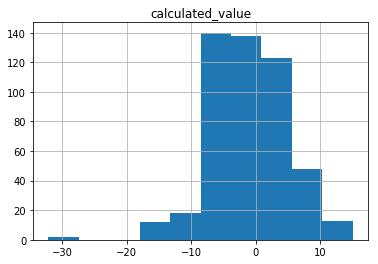

In [65]:
df_draft.hist(column='calculated_value')